# Solving Linear Systems
This follows the Note within: https://users.cs.utah.edu/~haocheng/notes/NoteonConjugateGradientMethod.pdf

### 1. Using Gradient Descent

Assume our linear system is given by $$A x = b$$

To solve it using gradient descent, we can first transform the system into its **quadratic form**: $$ f(x) = \frac{1}{2} x^T A x - x^T b $$

The gradient of $f(x)$ is: $$ \nabla f (x) = \frac{1}{2} (A^T + A) x - b $$

When $A$ is symetric, then the gradient is $$ \nabla f(x) = Ax - b $$ and this gradient is zero when $Ax = b$. Meaning that minimizing $f(x)$, is equivalent to solving the linear system.

In [106]:
import numpy as np

A = np.array([
    [1., 4.0],
    [4.0, 5.],
])
A = A @ A

b = 5 * np.array([4., 6.])

solution = np.linalg.solve(A, b)
print("Solution is:", solution)

Solution is: [0.82644628 0.24793388]


In [107]:
def is_pd(matrix) -> bool:
    es = np.linalg.eigvals(A)
    print(es)
    return es.min() >= 0.0

assert is_pd(A)

[ 2.16718427 55.83281573]


In [108]:
A @ solution - b

array([3.55271368e-15, 0.00000000e+00])

In [109]:
import matplotlib.pyplot as plt

In [110]:
def f(x):
    return 0.5 * (x.T @ A @ x) - (x @ b)

f(solution)

np.float64(-11.983471074380164)

Plot the landscape of $f(x)$:

In [111]:
x1s = np.linspace(0, 1)
x2s = x1s
X1, X2 = np.meshgrid(x1s, x2s)

In [112]:
Z = np.array([f(pair) for pair in np.array([X1.flatten(), X2.flatten()]).T]).T.reshape(X1.shape)

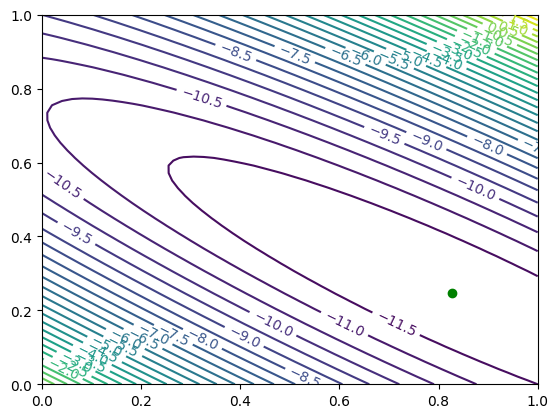

In [113]:
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Z, levels=30)
ax.scatter(*solution, color="green")
ax.clabel(CS, inline=True, fontsize=10)
plt.show()